# **Modelos de clasificación**

En esta práctica, haremos un recorrido por dos modelos clásicos de clasificación:

* `Árbol de decisión`
* `Regresión logistica`
* `Maquinas de soporte vectorial`
* `Vecinos más cercanos`

Para abordar estos modelos, estaremos trabajando con un dataset clásico: `Iris`. [Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris) podrán encontrar más información respecto a cómo se compone este conjunto de datos.

Scikit-Learn ya trae algunos datasets integrados. Para ello, debemos importarlos desde el módulo *sklearn.datasets*.

In [14]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Cargamos dataset
from sklearn.datasets import load_iris # sklearn me permite acceder a el
iris = load_iris() # lo almacenamos en una variable que llamamos iris
iris # imprimimos iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Si imprimen la variable "iris", podrán observar que no tiene una estructura de DataFrame. Para ello, debemos convertirla con la libería Pandas.

In [19]:
# organizar iris en formato dataframe
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Ahora tenemos nuestro dataset Iris expresado en una estructura DataFrame de Pandas.

In [20]:
data.shape

(150, 5)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [24]:
data.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

### `Pairplot`

En esta instancia, emplearemos un paso fundamental dentro de todo **EDA** que nos muestra todas las relaciones entre las variables cuantitativas del dataframe que estemos trabajando. La importancia de este paso radica en que nos permite elegir las mejores variables predictoras para nuestro modelo. Si queremos predecir la variedad de una flor, lo más racional sería seleccionar aquellos atributos que tengan una mayor incidencia en que una flor pertenezca a una u otra categoría.

Como se desprende de lo comentado, este paso es condición _sine qua non_ en cualquier **Análisis Exploratorio de Datos** que emprendan.

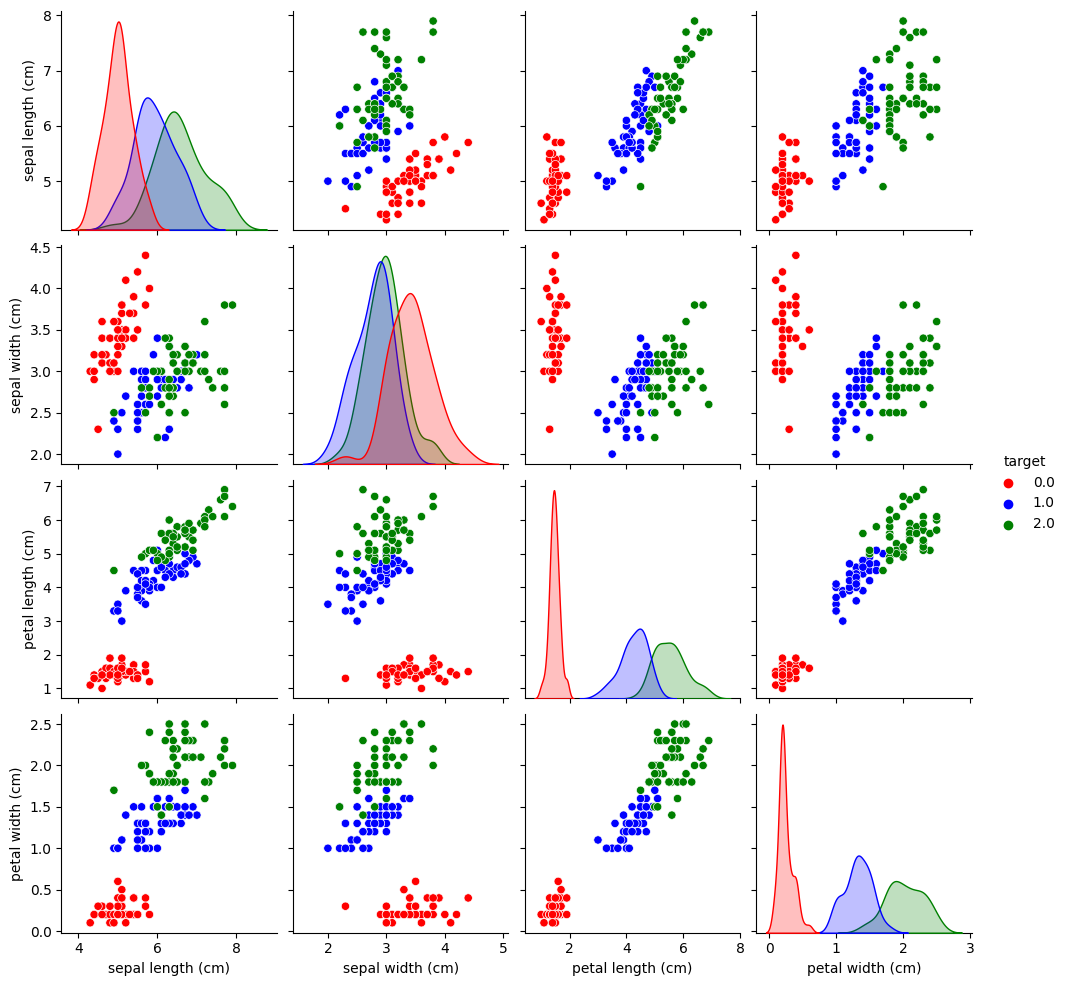

In [25]:
sns.pairplot(data, hue="target", palette = ['r', 'b', 'g'])
plt.show()

In [26]:
# sacar correlación
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Separamos del dataframe dos atributos y las etiquetas. Llamaremos **`X`** a los features e **`y`** a las etiquetas.

In [28]:
# separar data frame
X = data.iloc[:, :-1]

In [30]:
y =  data.target

## **1. Árbol de decisión**

Ahora que tenemos nuestras variables predictoras `X`, por un lado, y nuestra varible a predecir `y`, por el otro, vamos a crear un modelo de árbol de decisión.

Recordemos el flujo de trabajo de ML en Scikit-Learn: creamos el modelo / entrenamos / predecimos.

In [31]:
# librerías
from sklearn import tree
from sklearn.model_selection import train_test_split

# definir modelo
clf = tree.DecisionTreeClassifier()

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.2)

# entrenar modelo
clf = clf.fit(X_train, y_train)

In [35]:
# Exploramos algunas de las características del modelo entrenado. Para pensar,
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0. 1. 2.]
3
4
[0.01253395 0.01253395 0.54934776 0.42558435]


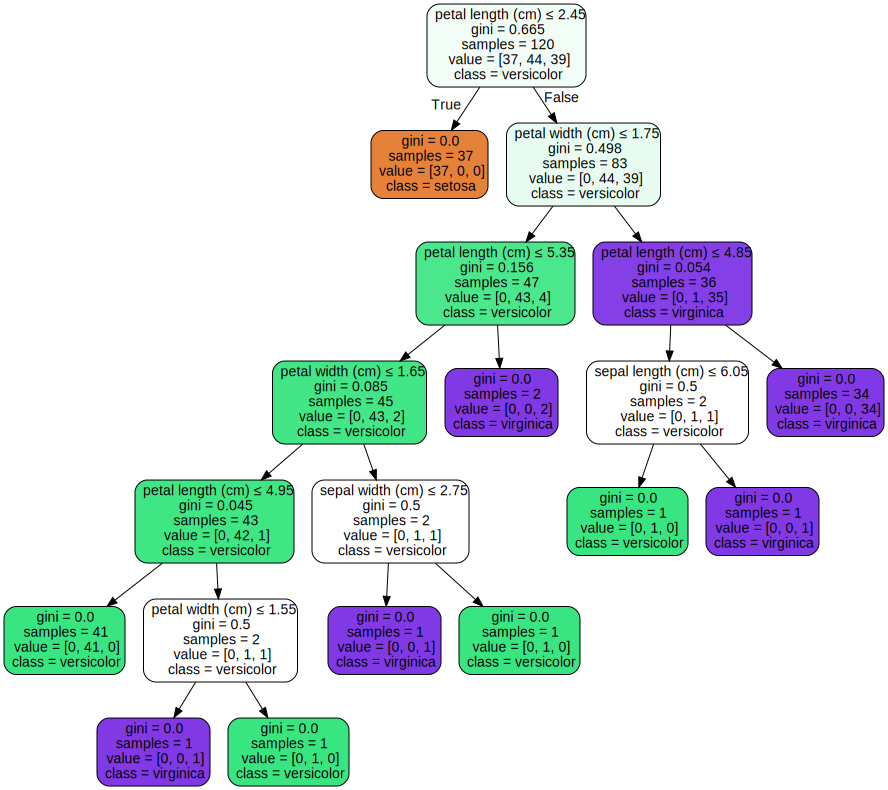

In [36]:
# visualizar el árbol
import graphviz
dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

<BarContainer object of 4 artists>

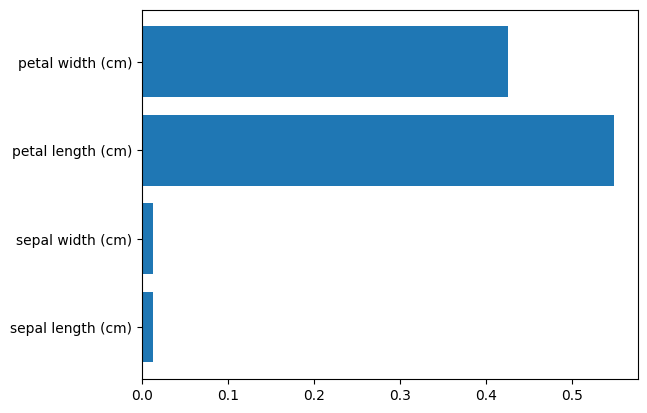

In [37]:
# Visualizar de manera más clara la importancia de las variables:
plt.barh(list(X_train.columns), clf.feature_importances_)

Ahora **evaluaremos** nuestro modelo de clasificación. No te preocupes, la próxima clase veremos más en profundiad cada una de las métricas existentes para los problemas de clasificación. Un adelanto: existe algo llamado matriz de confusión, que tiene una serie de métricas muy importantes, entre ellas la precisión (_acurracy_).

**Evaluación del modelo**

In [39]:
from sklearn.metrics import accuracy_score

# Aplicar el modelo entrenado sobre test y train
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Accuracy train:', accuracy_score(y_train,y_pred_train))
print('Accuracy test:', accuracy_score(y_test,y_pred_test))

Accuracy train: 1.0
Accuracy test: 0.9666666666666667


**¿Cómo podemos mejorar el desempeño de nuestro modelo?**

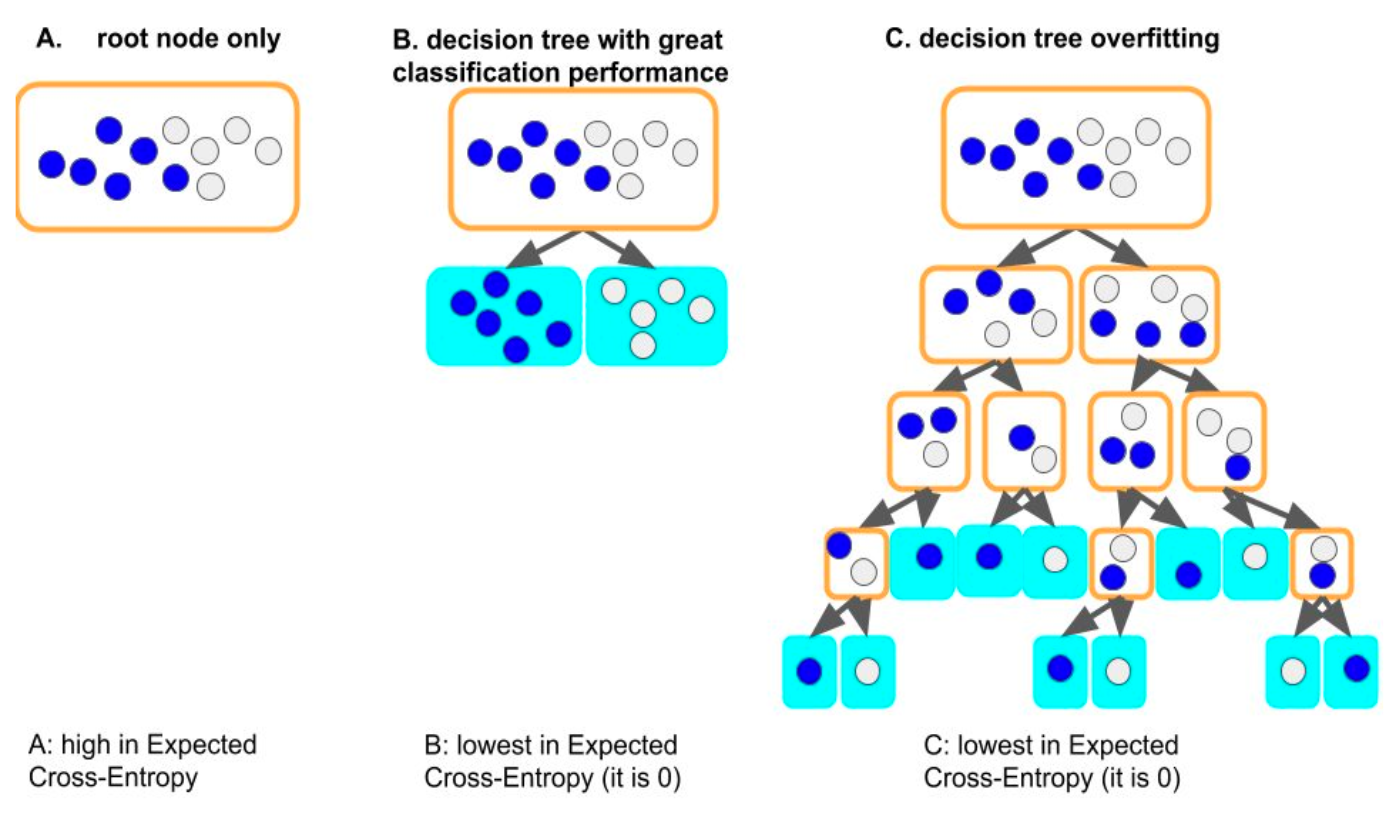

**Hiperparametros**

* Número minimo de observaciones asignadas a cada nodo de hoja u observaciones minimas para dividir.
* Definir profundidad maxima del árbol
* Definir número de nodos terminales

*Probá  modificar la profundiad del árbol para analizar su impacto en el accuracy de test.*

 A priori, si aumentaras su profundidad, ¿pensás que será más o menos preciso? ¿Se ajustará más o menos a los datos?

In [40]:
help(tree.DecisionTreeClassifier) # cuales son los parametros que tiene nuestra función?

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

Partiendo de las conclusiones anteriores podriamos hacer ciertas modifcaciones en nuestro ejercicio

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
y.name

'target'

In [41]:
# dividir el conjunto de datos
X = data[['petal width (cm)', 'petal length (cm)']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = data.target # Etiqueta a predecir


# definir modelo
clf = tree.DecisionTreeClassifier(max_depth = 3)


# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.2)


# entrenar modelo
clf = clf.fit(X_train, y_train)


# Aplicar el modelo entrenado sobre test y train
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


# Evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 97.5
Accuracy test: 93.33


Visualicemos el nuevo árbol

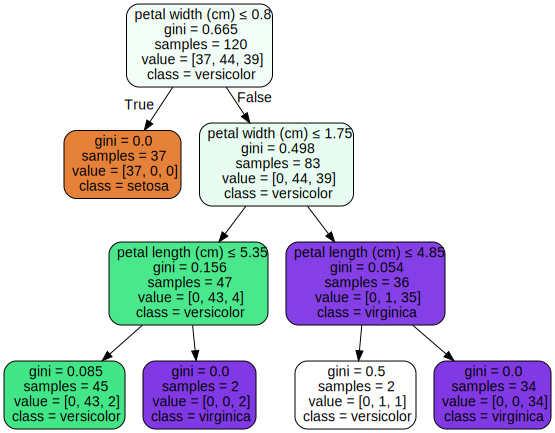

In [43]:
# visualizar el árbol
dot_data = tree.export_graphviz(clf,
                                feature_names=['petal width (cm)', 'petal length (cm)'],
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Como solo utilizamos dos variables, observemos en esta etapa las fronteras de clasificación que estableció nuestro modelo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


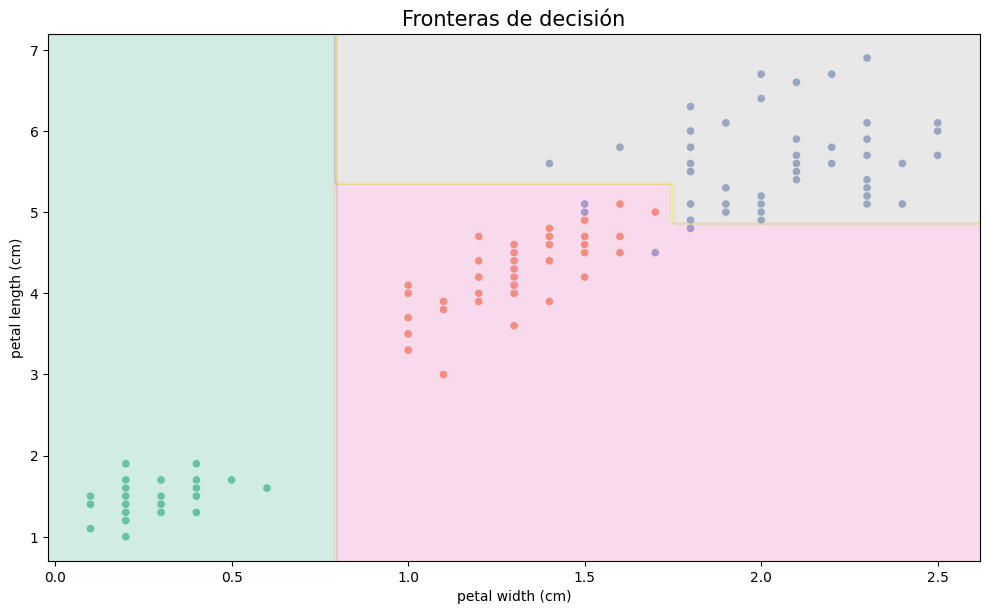

In [44]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

¿Cuál modelo es mejor? ¿Por qué nos quedariamos con ese?

## **2. Regresión Logística**

In [45]:
# Importamos la clase que contiene el algoritmo de regresíon logística
from sklearn.linear_model import LogisticRegression


# Instanciamos el modelo y lo entrenamos
clf = LogisticRegression()

# Lo entrenamos
clf.fit(X_train,y_train)

# Hacemos la predicción
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 95.83
Accuracy test: 93.33


In [47]:
# Observamos los parámetros de la función sigmoide
print('Coeficientes', clf.coef_)

Coeficientes [[-1.08350529 -2.62536869]
 [-0.77915172  0.06573901]
 [ 1.86265701  2.55962968]]


In [48]:
print('Interceptos', clf.intercept_)

Interceptos [ 10.5358433    3.09544398 -13.63128728]


¿Por qué hay tres pares de coeficientes?

La clasificación multiclase se refiere a las tareas de clasificación que tienen más de dos etiquetas de clase. La clasificación multiclase no suele tener una noción de “normal” o “anormal”. Más bien, los ejemplos son clases que forman parte de una clase entre una serie de clases conocidas.

* Ejemplos de clasificación multi clase
* Color de las flores (rojo, azul, amarillo)
* Tipo de animal (gato, perro, pez)
* Especies de aves (pinzón, arrendajo azul, colibrí)
* Tallas de ropa (pequeña, mediana, grande)

La clasificación multi-clase puede utilizar una amplia gama de posibles algoritmos.
* Vecinos más cercanos (kNNs)
* Árboles de decisión
* Bosque aleatorio
* Naïve-Bayes

Algoritmos binarios como la **regresión logística** o las **máquinas de vectores de soporte** pueden ser adaptados para su uso en múltiples clases bajo estrategias como uso de uno-vs-todos

**Multiclass as One-Vs-The-Rest:**

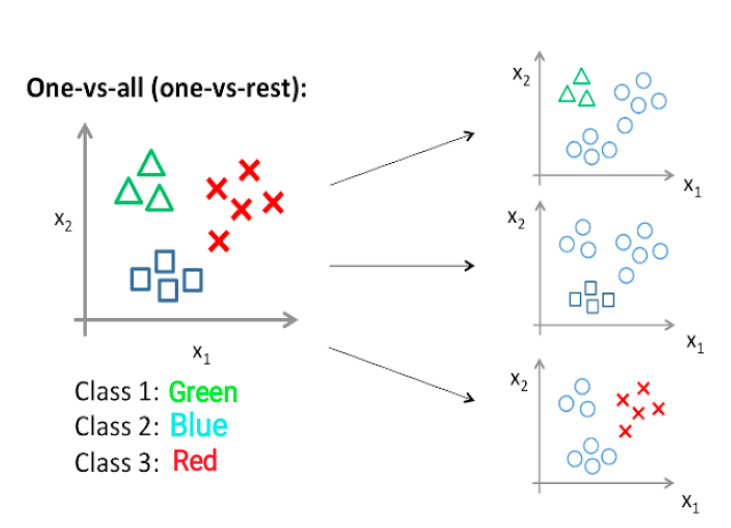

## **3. Maquinas de Soporte Vectorial**

## **Separación Lineal**

In [49]:
# Importamos la clase que contiene el algoritmo
from sklearn.svm import SVC

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.3)

# Instanciamos el modelo y lo entrenamos
clf = SVC(kernel = 'linear')

# Lo entrenamos
clf.fit(X_train,y_train)

# Hacemos la predicción
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 96.19
Accuracy test: 95.56


## **Separación no lineal**

Este algoritmo consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es su capacidad cae drásticamente.

Para enfrentarse a estos escenarios en los que la separación de los grupos es no lineal se expanden las dimensiones del espacio original.

Esto se logra usando un **Kernel** para transformar las características. La funciones kernel asignan los datos a un espacio dimensional diferente que suele ser superior, con la expectativa de que resulte más fácil separar las clases después de la transformación.

### **Kernels**

Las funciones Kernels son las que le dan a las SVM su poder para separar los puntos no linealmente separables, en un espacio de mayor dimensionalidad.

Los Kernels más típicos son:

+ `Gaussiano`

+ `Sigmoide`

+ `Polinomial`

Normalmente no definimos una proyección específica para nuestros datos, sino que seleccionamos entre los Kernels disponibles. El Kernel es un **hiperparámetro**.

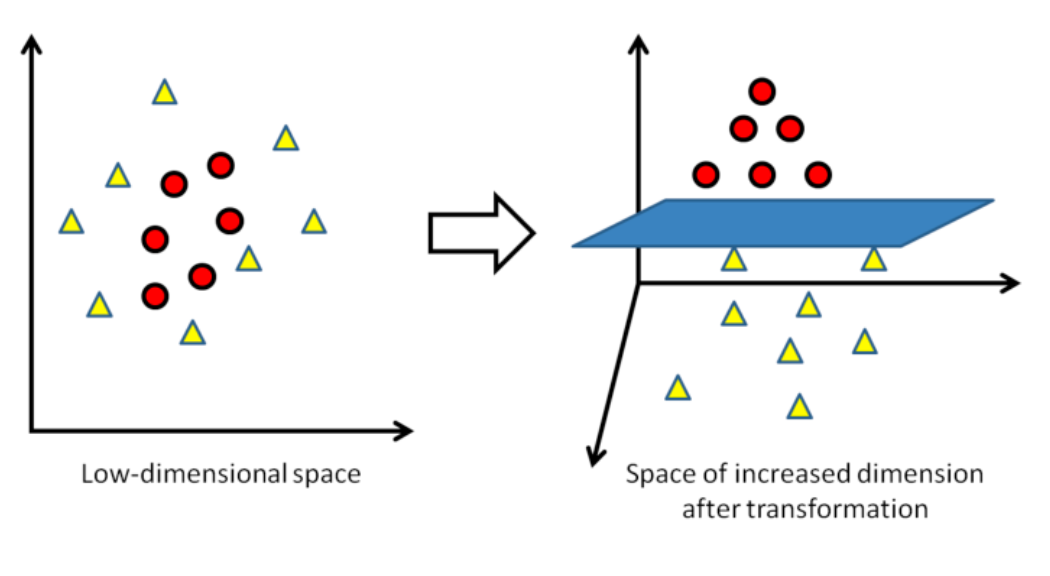

In [51]:
# importamos la clase que contiene el algoritmo
from sklearn.svm import SVC

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.3)

# instanciamos el modelo y lo entrenamos
clf = SVC(kernel= 'poly')

# lo entrenamos
clf.fit(X_train,y_train)

# hacemos la predicción
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 96.19
Accuracy test: 93.33


### **Otros Hiperparametros**

El hiperparámetro *C* determina cuán grande es el deseo de una buena clasificación. Un valor más alto de *C* implica que queremos menos errores en los datos de entrenamiento.

Si los datos de entrenamiento no son perfectamente separables, se puede jugar con el valor de *C*, introduciendo cierto nivel de error en el entrenamiento, con tal de mejorar el rendimiento ante datos nunca vistos.

El valor por defecto es 1.0

*Se propone hacer una función para iterar sobre diferentes valores de C para ver como impacta el accuracy*

## **3. Vecinos más cercanos**

In [52]:
# importamos la clase que contiene el algoritmo
from sklearn.neighbors import KNeighborsClassifier

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.3)

# instanciamos el modelo y lo entrenamos
clf = KNeighborsClassifier(n_neighbors=5)

# lo entrenamos
clf.fit(X_train,y_train)

# hacemos la predicción
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 97.14
Accuracy test: 95.56


Observermos, en esta etapa, las fronteras de clasificación que fijó nuestro modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


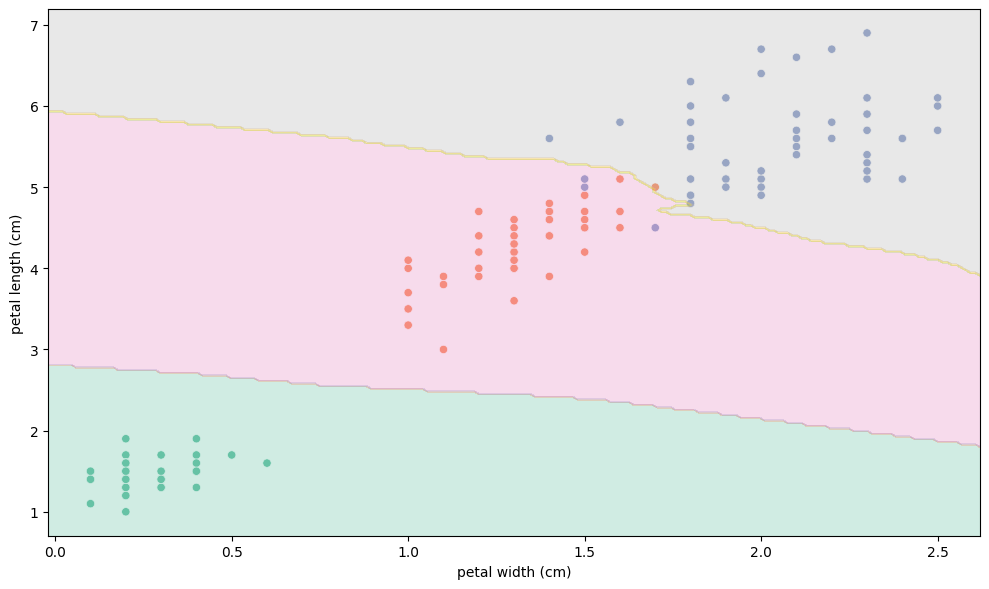

In [53]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.show()

*Probá  modificar la cantidad de vecinos **k** para analizar su impacto en el establecimiento de las fronteras de decisión por parte de nuestro clasificador.*

Para ello, averiguar sobre el hiperparámetro `n_neighbors` de KNeighborsClassifier. [Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) les dejamos la documentación.